This lab on K-Means and Hierarchical Clustering.

# K-Means Clustering
The `sklearn` function `Kmeans()` performs K-means clustering. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We begin with a simple simulated example in which there truly are two clusters in the
data. In order to do that, we generate 50 random 2-dimensional datapoints.

In [2]:
np.random.seed(123)
X = np.random.randn(50,2)
# We check that we have 50 values in two columns
print(X.shape)

(50, 2)


To make the first 25 datapoints different, we shift their mean in both axis (X-axis in column 0 and Y-axis in column 1).

In [3]:
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

Now, we plot the values in a scatter plot

Text(0, 0.5, 'X1')

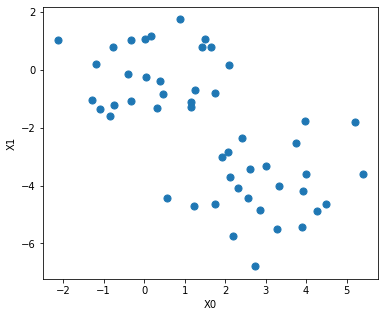

In [6]:
f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

We can see that the data forms two clear clusters.

Now we apply K-means

In [7]:
# This is how we import the function that allow us to use the K-means algorithm
from sklearn.cluster import KMeans
# The next fundtion creates the k-means model
# This means that the hyperparameter K = 2
kmeans = KMeans(n_clusters = 2, random_state = 123)
# Now we fit the data into two clusters with our data stored in the array X
kmeans.fit(X)

The cluster assignments of the 50 observations are contained in kmeans.labels_
    We can print it to see the assignments

In [8]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In this very simple example, the K-means clustering algorithm perfectly separated the observations into two clusters even though we did not supply any group information (no labels - unsupervised learning). 

We can plot the data, with each observation colored according to its cluster assignment:

Text(0, 0.5, 'X1')

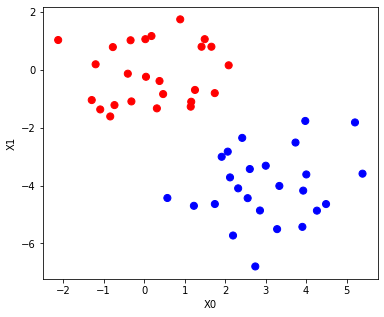

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 
plt.xlabel('X0')
plt.ylabel('X1')

And we can also visualise in the same plot the centroids. To do that we add a second plot with the centroids in cyan colour

Text(0, 0.5, 'X1')

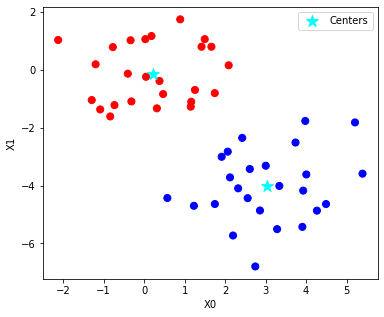

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

In this example, we knew in advance that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters and we cannot plot the data since normally we have more than three features. 

If we didn't know, we could instead have performed K-means clustering on this example with K  =  3. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

In [14]:
# We create and fit another model, but this time with K=3 (three clusters)
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

KMeans(n_clusters=3, random_state=123)

An we plot it with the corresponding three centroids

Text(0, 0.5, 'X1')

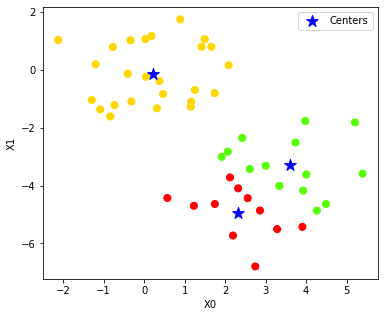

In [15]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

We saw in class that K-means is very sensitive to the initial random assigments of the centroids. We can tell Python to try different random configurations and choose the best one. To do that, we use the n_init argument (the default value is 10). Here we compare using n_init = 1:

In [23]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123)
km_out_single_run.fit(X)

KMeans(n_clusters=3, n_init=1, random_state=123)

Text(0, 0.5, 'X1')

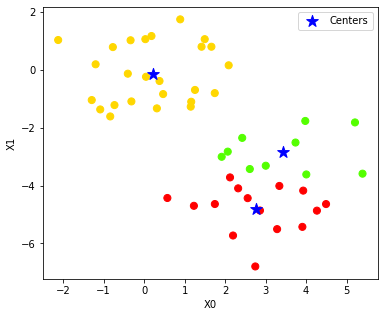

In [24]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=km_out_single_run.labels_, cmap=plt.cm.prism) 
plt.scatter(km_out_single_run.cluster_centers_[:, 0], km_out_single_run.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

In this example the difference of using multiple random positions for the centroids is not very important because the data is too simple, but we can still see the difference. It is generally recommended to always run K-means clustering with a large
value of `n_init`, such as 20 or 50.

`.inertia_` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering. In problems where we don't know the value of K, we can plot different `.inertia_` values for different values of K and search for the "elbow" point

In [25]:
km_out_single_run.inertia_

99.66252501749231